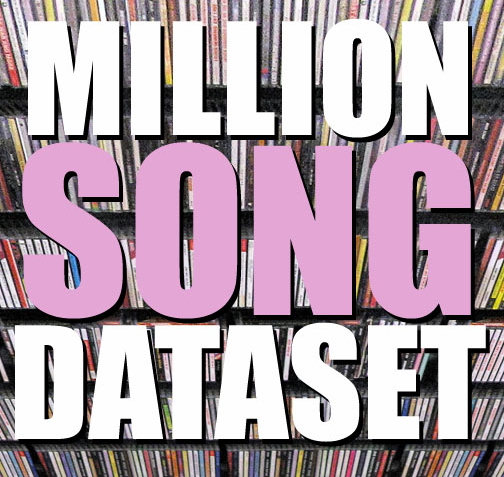

In [315]:
from IPython.core.display import Image
Image("C:/Users/utilisateur/Desktop/Projet Python/EMI music data science/photo.png")

# Peter MARTIGNY, 2AD

# Systèmes de recommandations et application à la prévision de ratings de chansons dans l’industrie du disque (EMI Group)
(Issu du projet Kaggle Million Song Dataset Challenge)

# Introduction

En Juillet 2012, la communauté Data Science London a organisé, en collaboration avec EMI Music (leader de l’industrie musicale), le Hackathon « Can you predict who will love a new song ? », chalenge qui a été hébergé par Kaggle.

Le principe est simple : EMI Music souhaite améliorer la qualité de son offre et la connaissance de ses clients, en leur proposant des recommandations musicales personnalisées.
Le but de ce projet est de développer un système de recommandation capable d’aider EMI Music à personnaliser son offre musicale.


# Quest-ce qu'un système de recommandation ?

Il esxiste une quantité considérable de musiques, et il est inconcevable pour un utilisateur de les écouter toutes pour se faire une idée de son appréciation. Un système de recommandation permet d'apporter une aide à l'utilisateur, et lui permet de lui recommander des musiques qu'il ne connait pas encore mais qui pourraient lui plaire étant donné ses écoutes précédentes, la similarité des nouvelles musiques avec celles qu'il connait déjà, ou encore le fait que des personnes ayant les mêmes goûts aient apprécié ces musiques.

Nous disposons dans ce projet de deux bases rendues publiques par EMI Music : 
-	users, présente les caractéristiques des utilisateurs
-	train présente les notes données par ces utilisateurs sur un certain nombre de chansons sélectionnées


Comment allons-nous y prendre ?

Durant ce projet, nous nous proposons dans un premier temps de regarder les données fournies et de dégager des premières informations.
Dans un second temps, nous étudions le problème d'un point de vue machine learning. Nous cherchons à savoir si un utilisateur va aimer une musique ou non. Nous introduirons alors une variable 'like' valant 0 ou 1, et notre objectif sera une prédiction de type classification binaire. Nous verrons alors plusieurs algorithmes permettant de répondre à cette interrogations.
Dans une troisième approche, nous tenterons de prédire la note (entre 0 et 100) donnée à une nouvelle chanson, par l'approche collaborative, en développant une approche centrée sur l'utilisateur, puis sa version duale (approche centrée sur la musique).
Enfin, nous aborderons succintement une méthode de factorisation de matrice, permettant également de calculer les notes de musiques qui n'ont pas encore été notées.

# 1) Commencons par observer ces bases

In [180]:
% pylab inline
import pandas as pd
import numpy as np

users=pd.read_csv("C:/Users/utilisateur/Desktop/Projet Python/EMI music data science/users.csv")
ratings=pd.read_csv("C:/Users/utilisateur/Desktop/Projet Python/EMI music data science/train.csv")


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [181]:
users.head(1)

,RESPID,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,36927,Female,60,Other,South,Music is important to me but not necessarily m...,1 hour,NaN,49,50,...,50,50,71,52,71,9,7,72,49,26


In [182]:
users.describe()

,RESPID,AGE,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
count,48645.000000,48178.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,...,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,42210.000000,48645.000000,35520.000000,35520.000000
mean,25562.400391,39.277180,49.113570,54.624422,51.284449,37.309125,34.585430,39.333615,33.845330,29.161743,...,55.011029,58.636433,53.665898,46.962657,53.446437,39.664562,35.579258,53.826288,42.232447,41.362631
std,15033.356108,15.955373,27.545252,23.770780,26.487641,23.598351,23.234577,25.744281,25.782182,24.267965,...,25.486398,23.837543,25.389724,26.664165,25.795551,26.061055,25.374290,25.891354,25.680349,26.455730
min,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12161.000000,25.000000,28.000000,44.000000,31.000000,14.000000,12.000000,14.000000,10.000000,9.000000,...,41.000000,48.000000,36.000000,28.000000,33.000000,13.000000,11.000000,35.000000,17.000000,14.000000
50%,26605.000000,39.000000,51.000000,53.000000,52.000000,34.000000,32.000000,35.000000,30.000000,23.000000,...,53.000000,64.000000,54.000000,50.000000,53.000000,37.000000,32.000000,56.000000,47.000000,45.000000
75%,38766.000000,52.000000,70.000000,71.000000,71.000000,52.000000,51.000000,53.000000,52.000000,49.000000,...,72.000000,73.000000,71.000000,68.000000,71.000000,56.000000,52.000000,71.000000,58.000000,57.000000
max,50927.000000,94.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


users contient 

- RESPID, l'identité anonmysée de l'utilisateur
- GENDER, Homme-Femme
- AGE, numérique
- WORKING, 14 possibilités 
- REGION, 4 possibilits en UK
- MUSIC, son appétance à la musique, 6 possibilités
- LIST_OWN, une estimation du nombre d'heures écoutées volontairement par jour
- LIST_BACK, l'estimation du temps d'écoute de musique de fond, non choisie volontairement
- Q1 à Q19, réponses de 0 à 100 à 19 questions 

Nous avons ici des variables numériques et catégorielles.

Nous constatons qu'il y a 48645 utilisateurs différents dans l'enquêtes.

In [183]:
ratings.head(1)

,Artist,Track,User,Rating,Time
0,40,179,47994,9,17


In [184]:
ratings.describe()

,Artist,Track,User,Rating,Time
count,188690.000000,188690.000000,188690.000000,188690.000000,188690.000000
mean,22.207753,86.516191,26478.842106,36.435391,15.660671
std,14.485397,56.017025,13632.273985,22.586036,6.441050
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,36.000000,17711.000000,15.000000,12.000000
50%,22.000000,80.000000,27831.000000,32.000000,17.000000
75%,35.000000,142.000000,35949.000000,50.000000,21.000000
max,49.000000,183.000000,50927.000000,100.000000,23.000000


In [185]:
ratings.Track.unique().shape

(184,)

ratings contient :

- Artist, identifiant de l'artiste
- Track, identifiant de la chanson
- User, l'identité de l'utilisateur
- Rating, la note donnée par l'utilisateur
- Time, la date à laquelle l'utilisateueur a donné son avis


Nous n'avons ici ques des variables numériques.
En revanche, la valeur numérique des identifiants n'a aucun sens réel.
Nous ne prendrons pas en compte la variable 'Time' dans la suite de l'étude.

Nous observons que l'enquête se fait sur 184 musiques différentes.

Nous pouvons également observer la matrice d'adjacence correspondante. Chaque utilisateuer ne donnant que peu de notes, cette matrice comporte beaucoup de valeurs manquantes.

In [186]:
names = users.columns.tolist()
names[names.index('RESPID')] = 'User'
users.columns = names

merge = pd.merge(users, ratings)
adjacence = merge.pivot_table(values='Rating', index='User', columns='Track')
adjacence.head()

Track,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
User,,,,,,,,,,,,,,,,,,,,,
0,32,32,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27,28,NaN,49,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,28,30,29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Commencons par observer la distribution des notes :

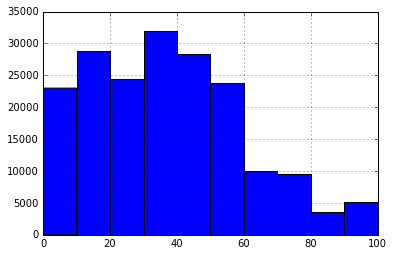

In [187]:
ratings.Rating.hist()

Nous observons des notes assez également distribuées avant 60, puis moins de notes supérieures à 60.

Observons maintenant la distribution des âges des users

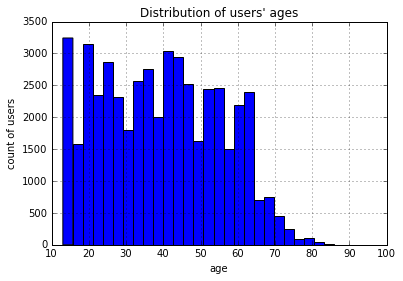

In [188]:
users.AGE.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age')

Encore une fois la distribution en âge est relativement uniforme, avec peu d'utilisateuers âgés de plus de 65 ans, et aucun enfant de moins de 10 ans.

Nous pouvons également nous demander quelles sont les musiques qui ont reçu le plus de notes

In [189]:
top_tracks = pd.value_counts(ratings.Track)
top_tracks.head()

11    2795
12    2782
85    2471
48    2378
22    2295
Name: Track, dtype: int64

La musique 11 est celle récoltant le plus de notes. Mais qui sont ces noteurs ?

In [190]:
track11Reviewers = ratings[ratings.Track == 11].User
track11Reviewers.head(10)

40     37978
87      5427
199     2873
232     2757
290     3122
401    36117
408    37384
419     3497
511     5336
545     3790
Name: User, dtype: int64

# 2) Peut-on prédire si un utilisateur va aimer ou non une musique ?

Nous nous nous proposons de classifier l'utilité d'un utilisateur face à une musique 
par 1 s'il l'aime et par 0 s'il ne l'aime pas.

Nous transformons donc les données de notes en attribuant 1 à une note supérieure à 50 et 0 à une note inférieure à 50.

Les valeurs de LIST_OWN et LIST_BACK doivent être nettoyées car elles sont sous forme string au lieu d'être numériques.
Nous transformons les variables qualitatives en dummy variables et nous choisissons de rejeter les valeurs manquantes (nous avons alors une base d'utilisateurs plus petite, de 26725 personnes).

In [191]:
data = users
data.LIST_OWN[data.LIST_OWN == '1 hour'] = 1
data.LIST_OWN[data.LIST_OWN == '2 hours'] = 2
data.LIST_OWN[data.LIST_OWN == '5 hours'] = 5
data.LIST_OWN[data.LIST_OWN == '7 hours'] = 7
data.LIST_OWN[data.LIST_OWN == '1'] = 1
data.LIST_OWN[data.LIST_OWN == '0'] = 0
data.LIST_OWN[data.LIST_OWN == '8 hours'] = 8
data.LIST_OWN[data.LIST_OWN == '5'] = 5
data.LIST_OWN[data.LIST_OWN == '16 hours'] = 16
data.LIST_OWN[data.LIST_OWN == '3'] = 3
data.LIST_OWN[data.LIST_OWN == '2'] = 2
data.LIST_OWN[data.LIST_OWN == '8'] = 8
data.LIST_OWN[data.LIST_OWN == '0 hours'] = 0
data.LIST_OWN[data.LIST_OWN == '6 hours'] = 6
data.LIST_OWN[data.LIST_OWN == '4 hours'] = 4
data.LIST_OWN[data.LIST_OWN == '4'] = 4
data.LIST_OWN[data.LIST_OWN == '12 hours'] = 12
data.LIST_OWN[data.LIST_OWN == '14 hours'] = 14
data.LIST_OWN[data.LIST_OWN == '10 hours'] = 10
data.LIST_OWN[data.LIST_OWN == '7'] = 7
data.LIST_OWN[data.LIST_OWN == '15 hours'] = 15
data.LIST_OWN[data.LIST_OWN == '6'] = 6
data.LIST_OWN[data.LIST_OWN == '9 hours'] = 9
data.LIST_OWN[data.LIST_OWN == '11 hours'] = 11
data.LIST_OWN[data.LIST_OWN == '10'] = 10
data.LIST_OWN[data.LIST_OWN == '12'] = 12
data.LIST_OWN[data.LIST_OWN == '9'] = 9
data.LIST_OWN[data.LIST_OWN == '13 hours'] = 13
data.LIST_OWN[data.LIST_OWN == '15'] = 15
data.LIST_OWN[data.LIST_OWN == '14'] = 14
data.LIST_OWN[data.LIST_OWN == '20'] = 20
data.LIST_OWN[data.LIST_OWN == '13'] = 13
data.LIST_OWN[data.LIST_OWN == '24'] = 24
data.LIST_OWN[data.LIST_OWN == '11'] = 11
data.LIST_OWN[data.LIST_OWN == '16'] = 16
data.LIST_OWN[data.LIST_OWN == '17'] = 17
data.LIST_OWN[data.LIST_OWN == '18'] = 18
data.LIST_OWN[data.LIST_OWN == 'Less than an hour'] = 0.5
data.LIST_OWN[data.LIST_OWN == '16+ hours'] = 17
data.LIST_OWN[data.LIST_OWN == 'More than 16 hours'] = 17
data.LIST_OWN[data.LIST_OWN == '3 hours'] = 3
data.LIST_OWN[data.LIST_OWN == '0 Hours'] = 0

data.LIST_BACK[data.LIST_BACK == '1 hour'] = 1
data.LIST_BACK[data.LIST_BACK == '2 hours'] = 2
data.LIST_BACK[data.LIST_BACK == '5 hours'] = 5
data.LIST_BACK[data.LIST_BACK == '7 hours'] = 7
data.LIST_BACK[data.LIST_BACK == '1'] = 1
data.LIST_BACK[data.LIST_BACK == '0'] = 0
data.LIST_BACK[data.LIST_BACK == '8 hours'] = 8
data.LIST_BACK[data.LIST_BACK == '5'] = 5
data.LIST_BACK[data.LIST_BACK == '16 hours'] = 16
data.LIST_BACK[data.LIST_BACK == '3'] = 3
data.LIST_BACK[data.LIST_BACK == '2'] = 2
data.LIST_BACK[data.LIST_BACK == '8'] = 8
data.LIST_BACK[data.LIST_BACK == '0 hours'] = 0
data.LIST_BACK[data.LIST_BACK == '6 hours'] = 6
data.LIST_BACK[data.LIST_BACK == '4 hours'] = 4
data.LIST_BACK[data.LIST_BACK == '4'] = 4
data.LIST_BACK[data.LIST_BACK == '12 hours'] = 12
data.LIST_BACK[data.LIST_BACK == '14 hours'] = 14
data.LIST_BACK[data.LIST_BACK == '10 hours'] = 10
data.LIST_BACK[data.LIST_BACK == '7'] = 7
data.LIST_BACK[data.LIST_BACK == '15 hours'] = 15
data.LIST_BACK[data.LIST_BACK == '6'] = 6
data.LIST_BACK[data.LIST_BACK == '9 hours'] = 9
data.LIST_BACK[data.LIST_BACK == '11 hours'] = 11
data.LIST_BACK[data.LIST_BACK == '10'] = 10
data.LIST_BACK[data.LIST_BACK == '12'] = 12
data.LIST_BACK[data.LIST_BACK == '9'] = 9
data.LIST_BACK[data.LIST_BACK == '13 hours'] = 13
data.LIST_BACK[data.LIST_BACK == '15'] = 15
data.LIST_BACK[data.LIST_BACK == '14'] = 14
data.LIST_BACK[data.LIST_BACK == '20'] = 20
data.LIST_BACK[data.LIST_BACK == '13'] = 13
data.LIST_BACK[data.LIST_BACK == '24'] = 24
data.LIST_BACK[data.LIST_BACK == '11'] = 11
data.LIST_BACK[data.LIST_BACK == '16'] = 16
data.LIST_BACK[data.LIST_BACK == '17'] = 17
data.LIST_BACK[data.LIST_BACK == '18'] = 18
data.LIST_BACK[data.LIST_BACK == 'Less than an hour'] = 0.5
data.LIST_BACK[data.LIST_BACK == '16+ hours'] = 17
data.LIST_BACK[data.LIST_BACK == 'More than 16 hours'] = 17
data.LIST_BACK[data.LIST_BACK == '3 hours'] = 3
data.LIST_BACK[data.LIST_BACK == '0 Hours'] = 0
data.LIST_BACK[data.LIST_BACK == nan] = 0
data.LIST_BACK[data.LIST_BACK == '21'] = 21
data.LIST_BACK[data.LIST_BACK == '19'] = 19
data.LIST_OWN[data.LIST_OWN == nan] = 0
data.LIST_OWN[data.LIST_OWN == '22'] = 22
data.LIST_OWN=data.LIST_OWN.fillna(data.LIST_OWN.mean())
data.LIST_BACK=data.LIST_BACK.fillna(data.LIST_BACK.mean())

C:\Users\utilisateur\Desktop\Cours\ENSAE\Info et ADD\Python\ensae\python\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\utilisateur\Desktop\Cours\ENSAE\Info et ADD\Python\ensae\python\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\utilisateur\Desktop\Cours\ENSAE\Info et ADD\Python\ensae\python\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/

In [194]:
data = data.dropna()

On peut regarder les histogrammes des features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000035AB06D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000003862D630>]], dtype=object)

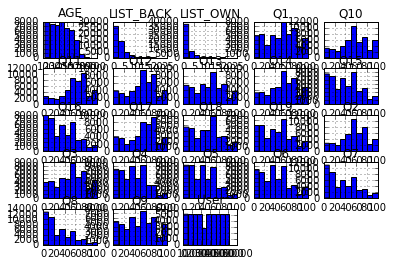

In [239]:
users.hist()

In [195]:
data.User.count() # Nombre d'utilisateurs restants

28773

In [196]:
# On transforme alors les variables catégorielles en dummy

data = pd.get_dummies(data)

Notre base contient alors beaucoup plus de features que précédemment :

In [197]:
merge = pd.merge(data, ratings)
merge.columns

Index(['User', 'AGE', 'LIST_OWN', 'LIST_BACK', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16',
       'Q17', 'Q18', 'Q19', 'GENDER_Female', 'GENDER_Male',
       'WORKING_Employed 30+ hours a week',
       'WORKING_Employed 8-29 hours per week',
       'WORKING_Employed part-time less than 8 hours per week',
       'WORKING_Full-time housewife / househusband',
       'WORKING_Full-time student',
       'WORKING_In unpaid employment (e.g. voluntary work)', 'WORKING_Other',
       'WORKING_Part-time student', 'WORKING_Prefer not to state',
       'WORKING_Retired from full-time employment (30+ hours per week)',
       'WORKING_Retired from self-employment', 'WORKING_Self-employed',
       'WORKING_Temporarily unemployed', 'REGION_Midlands', 'REGION_North',
       'REGION_Northern Ireland', 'REGION_South',
       'MUSIC_I like music but it does not feature heavily in my life',
       'MUSIC_Music has no particular interest for 

On souhaite prédire la valeur de y en fonction des autres variables, on va donc séparer la variable rating des autres variables.

In [198]:
X = merge[['AGE', 'LIST_OWN', 'LIST_BACK', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16',
       'Q17', 'Q18', 'Q19', 'GENDER_Female', 'GENDER_Male',
       'WORKING_Employed 30+ hours a week',
       'WORKING_Employed 8-29 hours per week',
       'WORKING_Employed part-time less than 8 hours per week',
       'WORKING_Full-time housewife / househusband',
       'WORKING_Full-time student',
       'WORKING_In unpaid employment (e.g. voluntary work)', 'WORKING_Other',
       'WORKING_Part-time student', 'WORKING_Prefer not to state',
       'WORKING_Retired from full-time employment (30+ hours per week)',
       'WORKING_Retired from self-employment', 'WORKING_Self-employed',
       'WORKING_Temporarily unemployed', 'REGION_Midlands', 'REGION_North',
       'REGION_Northern Ireland', 'REGION_South',
       'MUSIC_I like music but it does not feature heavily in my life',
       'MUSIC_Music has no particular interest for me',
       'MUSIC_Music is important to me but not necessarily more important',
       'MUSIC_Music is no longer as important as it used to be to me',
       'MUSIC_Music means a lot to me and is a passion of mine']]
Y = merge.Rating

On modifie les notes pour avoir une classification binaire

In [201]:
y1 = np.asarray(Y)
y1[y1 < 50] = 0
y1[y1 >= 50] = 1
Y = pd.DataFrame(y1)

Nos données sont donc prêtes à être entrainées par des modèles de classification binaire !

Commencons par diviser notre base en base d'apprentissage et base de test.

In [207]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

Puis nous utilisons un modèle d'apprentissage, ici le gradient boosting classifier

In [212]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
type_classifier = GradientBoostingClassifier
clf = type_classifier()
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

In [215]:
clf = clf.fit(X_train, Y_train.ravel())

Calculons alors la matrice de confusion associée à notre apprentissage

[[50352   754]
 [18306  1118]]
[[24686   409]
 [ 9155   489]]


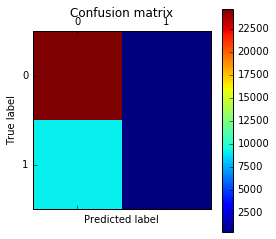

In [216]:
from sklearn.metrics import confusion_matrix
for x,y in [ (X_train, Y_train), (X_test, Y_test) ]:
    yp  = clf.predict(x)
    cm = confusion_matrix(y.ravel(), yp.ravel())
    print(cm)
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

On peut alors regarder l’importance des variables dans la construction du résultat

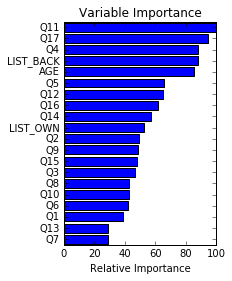

In [217]:
feature_name = X.columns
limit = 20
feature_importance = clf.feature_importances_[:20]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_name[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

On remarque que les 5 variables les plus importantes sont l'âge, le fait d'écouter de la musique de fond, et la réponse aux trois questions suivantes : 

Q11 : Pop music is fun, it makes me feel good (Thinking now about music, to what extent would you agree or disagree with the following statements?)

Q17 : I find seeing a new artist / band on TV a useful way of discovering new music (Thinking now about music, to what extent would you agree or disagree with the following statements?)

Q4 : I would like to buy new music but I don't know what to buy (Thinking now about music, to what extent would you agree or disagree with the following statements?)

Procédons à un ACP pour observer les variables

In [218]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x_transpose = X.T
pca.fit(x_transpose)

PCA(copy=True, n_components=4, whiten=False)

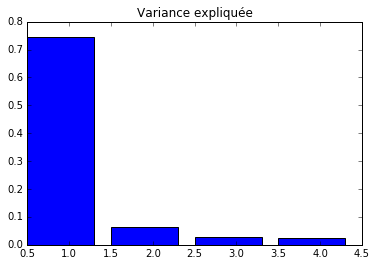

In [219]:
plt.bar(numpy.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

On retrouves les variables le splus importantes

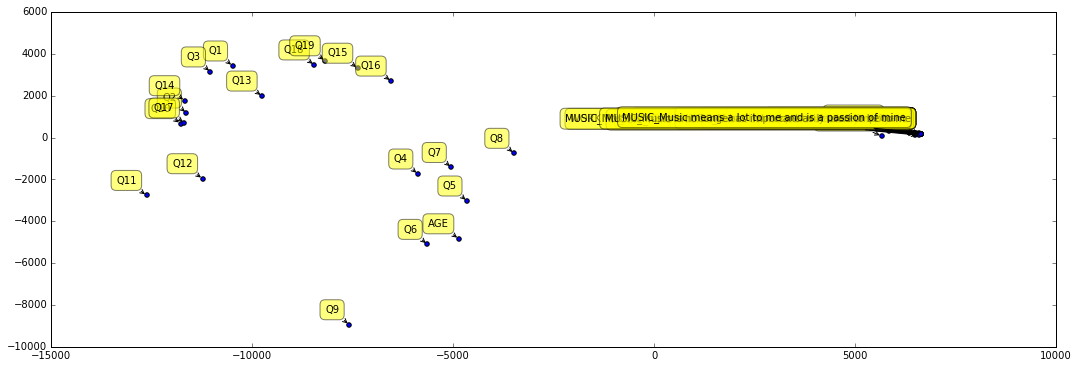

In [220]:
import warnings
warnings.filterwarnings('ignore')
X_reduced = pca.transform(x_transpose)
plt.figure(figsize=(18,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
for label, x, y in zip(x_transpose.index, X_reduced[:, 0], X_reduced[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

On va normaliser l'ACP pour mieux voir la séparation des variables

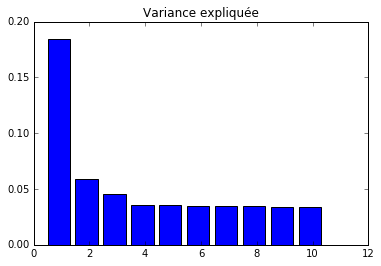

In [221]:
from sklearn.preprocessing import normalize
xnorm = normalize(x_transpose)
pca = PCA(n_components=10)
pca.fit(xnorm)
plt.bar(numpy.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

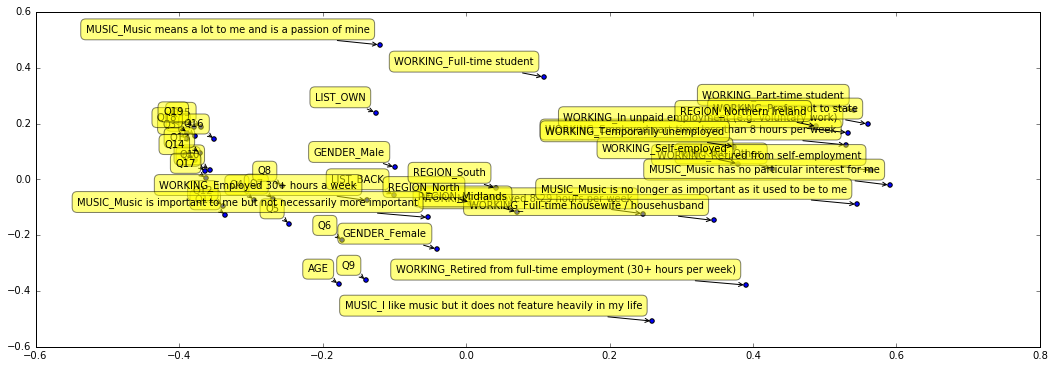

In [222]:
X_reduced = pca.transform(xnorm)
plt.figure(figsize=(18,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
for label, x, y in zip(x_transpose.index, X_reduced[:, 0], X_reduced[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

On voit qu'en normalisant les donées on obtient des variables plus différenciées, on va donc réapprendre le modèle avec les données normalisées

In [223]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import GradientBoostingClassifier
clf = Pipeline([
      ('normalize', Normalizer()),
      ('classification', GradientBoostingClassifier())
    ])
clf = clf.fit(X_train, Y_train.ravel())

In [224]:
from sklearn.metrics import confusion_matrix
x,y = X_test, Y_test
yp  = clf.predict(x)
cm2 = confusion_matrix(y, yp)
print("non normalisé\n",cm)
print("normalisé\n",cm2)

non normalisé
 [[24686   409]
 [ 9155   489]]
normalisé
 [[25070    25]
 [ 9585    59]]


On remarque qu'avec les données normalisées on gagne légèrement en prédiction de valeurs nulles, en revanche la pertinence des prédictions de musiques appréciées est très mauvaise.

Tracons les courbes ROC de notre modèle

In [225]:
from sklearn.metrics import roc_curve, auc
probas = clf.predict_proba(X_test)
probas[:5]

array([[ 0.6997752 ,  0.3002248 ],
       [ 0.74127386,  0.25872614],
       [ 0.79184967,  0.20815033],
       [ 0.88126519,  0.11873481],
       [ 0.77193601,  0.22806399]])

In [226]:
# Vecteur de bonnes réponses
rep = [ ]
yt = Y_test.ravel()
for i in range(probas.shape[0]):
    p0,p1 = probas[i,:]
    exp = yt[i]
    if p0 > p1 :
        if exp == 0 :
            # bonne réponse
            rep.append ( (1, p0) )
        else :
            # mauvaise réponse
            rep.append( (0,p0) )
    else :
        if exp == 0 :
            # mauvaise réponse
            rep.append ( (0, p1) )
        else :
            # bonne réponse
            rep.append( (1,p1) )
mat_rep = numpy.array(rep)
mat_rep[:5]

array([[ 1.        ,  0.6997752 ],
       [ 1.        ,  0.74127386],
       [ 1.        ,  0.79184967],
       [ 1.        ,  0.88126519],
       [ 1.        ,  0.77193601]])

In [227]:
"taux de bonne réponse",sum(mat_rep[:,0]/len(mat_rep)) # voir matrice de confusion

('taux de bonne réponse', 0.72336566970839722)

Le Gradient Boosting nous donne un score de 0.7234

Ce premier taux de réponse est relativement satisfaisant, dans le sens où il donne de meilleures réponses que des prédictions tirées au hasard, qui auraient pour taux de bonne réponse 0.5

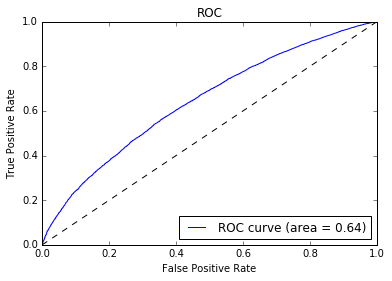

In [228]:
fpr, tpr, thresholds = roc_curve(mat_rep[:,0], mat_rep[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

Rajoutons quelques échantillons au graphe

(13123,) (13123,) (13101,) (13101,)


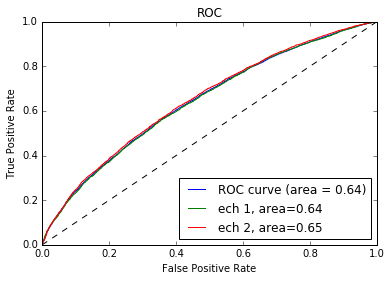

In [229]:
import random
Y1 = numpy.array([ random.randint(0,1) == 0 for i in range(0,mat_rep.shape[0]) ])
Y2 = numpy.array([ random.randint(0,1) == 0 for i in range(0,mat_rep.shape[0]) ])
fpr1, tpr1, thresholds1 = roc_curve(mat_rep[Y1,0], mat_rep[Y1, 1])
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = roc_curve(mat_rep[Y2,0], mat_rep[Y2, 1])
roc_auc2 = auc(fpr2, tpr2)
print(fpr1.shape,tpr1.shape,fpr2.shape,tpr2.shape)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax.plot([0, 1,2], [0, 1,2], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC')
ax.plot(fpr1, tpr1, label='ech 1, area=%0.2f' % roc_auc1)
ax.plot(fpr2, tpr2, label='ech 2, area=%0.2f' % roc_auc2)
ax.legend(loc="lower right")

Essayons maintenant l'algorithme random forest

In [267]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [326]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.73643455482310949

Le Random Forest nous donne un score de 0.7366

On obtient un meilleur score que pour le gradient boosting !

In [269]:
from sklearn.metrics import roc_curve, auc
probas = clf.predict_proba(X_test)
probas[:5]

array([[ 1.    ,  0.    ],
       [ 1.    ,  0.    ],
       [ 0.8375,  0.1625],
       [ 0.92  ,  0.08  ],
       [ 1.    ,  0.    ]])

Area under the ROC curve : 0.727164


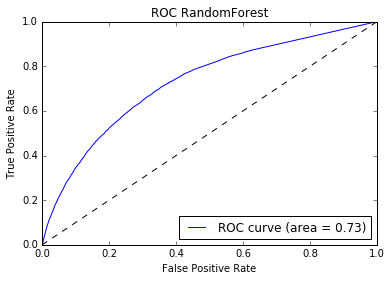

In [271]:
from sklearn.metrics import roc_curve, auc
probas = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC ' + 'RandomForest')
plt.legend(loc="lower right")

In [273]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf = clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.72635942312674517

La régression logistique nous donne un score de 0.7264

Ainsi, nous avons développé des algorithmes de classification binaire pour déterminer des prévisions d'appréciation des musiques. Celui nous donnant une meilleure précision de prédiction est le Random Forest.

Seulement, nous n'avons pas d'information sur les notes qu'ils donneraient !!!
On pourrait effectuer des classifications à plus de 2 catégorie, mais on se propose plutôt d'envisager d'autres perspectives que les algorithmes de classification.

# 3) Filtrage collaboratif

Lorsqu'on ne connait pas une chanson, afin de savoir si on va l'aimer ou non, il est naturel de demander conseil à des amis dont on sait que l'on partage les goûts musicaux. Ceci s'appelle le filtrage centré utilisateur (user-based filtering).
De manière duale, je peux voir à quelles musiques connues cette chanson ressemble, et si elle ressemble à une musique que j'apprécie alors je vais avoir tendance à l'apprécier. Ceci s'appelle le filtrage centré item (item-based filtering).

Maintenant, il va falloir formaliser ce qu'on entend par similitude. Qu'entend on par musique similaire à des chansons que je connais ? Qu'entend-on par personnes qui ont des goûts similaires aux miens ?

On se propose de traiter le cas user-based premièrement, le cas item-based s'en déduisant par dualité.

On cherche donc une mesure de similarité entre personnes.
Ainsi, pour une personne donnée, on cherche à établir un ranking des autres personnes, en fonction des notes qu'ils ont données, de telle sorte que la manière de noter des personnes proches est similaire à ma manière de noter les chansons.

On construit dans un premier temps une fonction qui à deux personnes donnent leur indice de similarité (allant de 0 à 1, de très éloigné à très proche), puis on établit, pour une persone donnée, un ranking des autres personnes selon la métrique utilisée pour la similarité.

Similarité par le coefficient de corrélation de Pearson, similarité par la métrique du cosinus

In [287]:
ratings.head()

,Artist,Track,User,Rating,Time
0,40,179,47994,9,17
1,9,23,8575,58,7
2,46,168,45475,13,16
3,11,153,39508,42,15
4,14,32,11565,54,19


In [297]:
def user_pearson_similarity(user1, user2):

            ## Ensembles de chansons

    user1_tracks=ratings[ratings.User == user1].Track.unique()
    user2_tracks=ratings[ratings.User == user2].Track.unique()
    
            ## Chansons en commun

    common_reviews=list(set(user1_tracks).intersection(user2_tracks))
    common_reviews

            ## Ensembles de notes sur les mêmes chansons, en numpy arrays

    rate1 = np.asarray(list(ratings[(ratings.User == user1) & (ratings.Track == i)].iloc[0][3] for i in common_reviews))
    rate2 = np.asarray(list(ratings[(ratings.User == user2) & (ratings.Track == i)].iloc[0][3] for i in common_reviews))

            ## Calcule les moyennes

    mean1 = mean(rate1)
    mean2 = mean(rate2)

            ## Calcule covariance et variances

    cov = np.dot(rate1 - mean1, rate2 - mean2)
    sqvar1 = sqrt(np.dot(rate1 - mean1, rate1 - mean1))
    sqvar2 = sqrt(np.dot(rate2 - mean2, rate2 - mean2))
    
                ## Calcule la similarité de pearson 
    if (sqvar1!=0) & (sqvar2!=0):
        pearson = cov/(sqvar1*sqvar2)
        return pearson
    else:
        return 'error'

In [298]:
def user_cosine_similarity(user1, user2):
    
        ## Ensembles de chansons

    user1_tracks=ratings[ratings.User == user1].Track.unique()
    user2_tracks=ratings[ratings.User == user2].Track.unique()
    
        ## Chansons en commun

    common_reviews=list(set(user1_tracks).intersection(user2_tracks))
    
    if len(common_reviews)>0:
    
        ## Ensemble de notes sur les mêmes chansons, en numpy array

        rate1 = np.asarray(list(ratings[(ratings.User == user1) & (ratings.Track == i)].iloc[0][3] for i in common_reviews))
        rate2 = np.asarray(list(ratings[(ratings.User == user2) & (ratings.Track == i)].iloc[0][3] for i in common_reviews))
    

    
        ## Calcule cosine

        numerator = np.dot(rate1, rate2)
        denominator = sqrt(np.dot(rate1, rate1))*sqrt(np.dot(rate2, rate2))
        cosine = numerator/denominator
    
        return cosine
    else:
        return 0

In [299]:
cosine_similarity(356, 356)

0.99999999999999989

Puis on écrit des fonctions qui pour une personne donnée retourne les 10 plus proches personnes

In [291]:
def top_pearson(user, number):
    Index = ratings.User.unique().tolist()
    together = pd.DataFrame([[pearson_similarity(user, i),i] for i in Index])
    together.columns = ['PearsonSimilarity', 'Friend']
    together = together.sort_values(['PearsonSimilarity'], ascending=False).head(number + 1)
    return together

In [292]:
def top_cosine(user, number):
    Index = ratings.User.unique().tolist()
    together = pd.DataFrame([[cosine_similarity(user, i),i] for i in Index])
    together.columns = ['CosineSimilarity', 'Friend']
    together = together.sort_values(['CosineSimilarity'], ascending=False).head(number + 1)
    return together

In [293]:
top_cosine(356, 5)

,CosineSimilarity,Friend
10,1,40578
31736,1,40735
32123,1,40528
32075,1,40162
32030,1,1575
32019,1,38940


Puis, pour une persone donée, on cherche à savoir la note qu'elle va donner à une chanson. On va donc regarder les personnes qui lui ressemblent le plus PARMI les personnes qui ont noté cette chanson. On modifie donc légèrement le code précédent.

In [300]:
def user_top_cosine_track(user, track):
    
    # Calcule les plus proches personnes parmi celles qui ont noté track
    Index = ratings[ratings.Track == track].User.unique().tolist()
    together = pd.DataFrame([[user_cosine_similarity(user, i),i] for i in Index])
    together.columns = ['UserCosineSimilarity', 'Friend']
    together = together.sort_values(['UserCosineSimilarity'], ascending=False)
    return together

In [301]:
a = user_top_cosine_track(3566, 11)
a.head()

,UserCosineSimilarity,Friend
1085,1,3566
0,1,37978
1674,1,36275
1665,1,36921
1667,1,37226


Enfin, on cherche à donner une note pour cete personne, qui sera fonction des notes données par les utilisateuers qui lui ressemblent. On appellera predictor cette fonction.

In [304]:
def user_average(user):
    
    # Calcule la note moyenne donnée par une personne
    
        user_tracks=ratings[ratings.User == user].Track.unique()
        rating = np.asarray(list(ratings[(ratings.User == user) & (ratings.Track == i)].iloc[0][3] for i in user_tracks))
        average = mean(rating)
        return average
    
def user_predictor(user, track): 
    
    # Calcule la prédiction de note en user-based filtering
    
    # Plus proches personnes parmi celles qui ont noté track
    
        friends_set = user_top_cosine_track(user, track)
        friends = friends_set.Friend.unique()
        
        cosine = np.asarray(friends_set.UserCosineSimilarity)
        cosine_abs = abs(cosine)
        
        friends_ratings = np.asarray(list(ratings[(ratings.User == i) & (ratings.Track == track)].iloc[0][3] - user_average(i) for i in friends))
        
        numerator = np.dot(cosine, friends_ratings)
        denominator = sum(cosine_abs)
        
        predictor = user_average(user) + numerator/denominator
        
        return predictor

In [306]:
user_predictor(134, 11)

nan

On définit désormais de manière duale les fonctions de prédiction d'item-based filtering

In [307]:
def track_cosine_similarity(track1, track2):
    
        ## Personnes qui ont noté track1, track2

    track1_users=ratings[ratings.Track == track1].User.unique()
    track2_users=ratings[ratings.Track == track2].User.unique()
    
        ## Personnes qui ont noté les 2

    common_reviewers=list(set(track1_users).intersection(track2_users))
    
    if len(common_reviewers)>0:
    
        ## Ensemble des notes sur les chansons en commun en numpy arrays

        rate1 = np.asarray(list(ratings[(ratings.User == i) & (ratings.Track == track1)].iloc[0][3] for i in common_reviewers))
        rate2 = np.asarray(list(ratings[(ratings.User == i) & (ratings.Track == track2)].iloc[0][3] for i in common_reviewers))
    

    
        ## Cacule cosine

        numerator = np.dot(rate1, rate2)
        denominator = sqrt(np.dot(rate1, rate1))*sqrt(np.dot(rate2, rate2))
        cosine = numerator/denominator
    
        return cosine
    else:
        return 0

In [308]:
track_cosine_similarity(11, 12)

0.9673072521327043

In [309]:
def top_cosine_track(user, track):
    
    # Etant donné user, classer les chansons qu'il a notée en fonction de leur ressemblance à track
    Index = ratings[ratings.User == user].Track.unique().tolist()
    together = pd.DataFrame([[track_cosine_similarity(track, i),i] for i in Index])
    together.columns = ['TrackCosineSimilarity', 'Track']
    together = together.sort_values(['TrackCosineSimilarity'], ascending=False)
    return together

In [310]:
def track_average(track):
    
    # Compute the average rating of track
    
        track_users=ratings[ratings.Track == track].User.unique()
        rating = np.asarray(list(ratings[(ratings.User == i) & (ratings.Track == track)].iloc[0][3] for i in track_users))
        average = mean(rating)
        return average

In [311]:
def track_predictor(user, track): 
    
    # Caclcul la prédiction en item-based filtering
    
    # Plus proches personnes ayant noté track
    
        tracks_set = top_cosine_track(user, track)
        tracks = tracks_set.Track.unique()
        
        cosine = np.asarray(tracks_set.TrackCosineSimilarity)
        cosine_abs = abs(cosine)
        
        tracks_ratings = np.asarray(list(ratings[(ratings.User == user) & (ratings.Track == i)].iloc[0][3] - track_average(i) for i in tracks))
        
        numerator = np.dot(cosine, tracks_ratings)
        denominator = sum(cosine_abs)
        
        predictor = track_average(track) + numerator/denominator
        
        return predictor

In [312]:
user_predictor(2333, 13)

1.4624918475042925

In [313]:
track_predictor(2333, 13)

-11.469524488487739

# 4) Ouverture : la factorisation de matrice

Durant la première étape, nous avions regardé la matrice d'adjacence

In [329]:
adjacence.head()

Track,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
User,,,,,,,,,,,,,,,,,,,,,
0,32,32,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27,28,NaN,49,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,28,30,29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cette matrice donne un accès intuitif aux notes de chaque utilisateur sur une même lignes.
Ainsi, on a une matrice très grande, dont la majorité des valeurs sont manquantes. Le but de notre système de recommandation serait de remplir les cases manquantes !

Nous allons alors aborder le thème de la factorisation de matrice, méthode très utilisée dans les librairies python spécialisées dans les systèmes de recommandation.
    Le principe est d'estimer la matrice d'adjacence complète (ie avec des valeurs partout) par un produit de matrice, de telle sorte que ce produit de matrice donne, pour les valeurs déjà connues de notes données auparavant, une estimation à erreur minimisée (comme d'habitude une métrique et une fonction de perte doivent être choisies, souvent norme euclidienne et perte quadratique). Ces matrices étant determinées, on obtient alors une estimation des notes qui n'avaient pas été données auparavant !!!
Pour calculer ces matrices, il convient de partir de deux matrices quelconques, puis d'appliquer un algorithme itératif de type gradient descent pour minimiser la fonction de perte (on change les coefficients des matrices désirées à chaque itération).


In [330]:
from sklearn.decomposition import NMF

In [331]:
model = NMF(n_components=2, init='random', random_state=0)

In [334]:
adjacence = adjacence.fillna(0)

In [347]:
model.fit(adjacence)

NMF(beta=1, eta=0.1, init='random', max_iter=200, n_components=2,
  nls_max_iter=2000, random_state=0, sparseness=None, tol=0.0001)

In [348]:
model.components_[1].shape

(184,)

In [339]:
model.reconstruction_err_ 

17141.308428422883

# Conclusion

Nous avons étudié le problème de recommandation de musiques sous plusieurs formes.

Dans un premier temps nous avons considéré la recommandation comme un problème de classification binaire. A partir d'informations sur les personnes interrogées, on a utilisé des modèles capables d'apprendre des tendances et donc de proposer des prédictions d'appréciation en fonction de la connaissance de la personne enregistrée. Nous avons utilisé plusieurs modèles et compar les résultats. Le random forest donnait les meilleurs résultats.

Puis on a voulu donner des recommandations en fonction de mesures de similarités, entre personnes ou entre chansons.
On a a lors écrit des fonctions de prédictions dans ces deux paradigmes.

Enfin, nous avons présenté une méthode basée sur l'algèbre linéaire et la recherche de variables latentes permettant de remplir les cases vides de la matrice d'adjacnce (et donc les notes non connues).


Pour poursuivre cette étude, il conviendrait dans un premier temps de vérifier les résultats donnés par les classifications binaires, en faisant des validations croisées par exemple, ce que j'ai omis de faire ici.

Pour l'approche colaborative, il conviendrait d'écrire une fonction qui prenne en compte les deux paradigmes, de sorte à avoir une fonction hybride donnant des prédictions en se basant sur les utilisateurs proches et sur les chansons proches.

Enfin, il conviendrait d'étudier plus en détail les méthodes de factorisation de matrice.

Il existe des librairies python dédiées aux systèmes de recommandation, comme recsys. Il serait très pertinent de tester les algorithmes proposés.